In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc

In [2]:
data = pd.read_csv('logistic_regression.csv')
df0 = data.copy()
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
df0.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
for i in df0.columns:
    print(i, '-->> ', df0[i].unique(), '\n')

loan_amnt -->>  [10000.  8000. 15600. ... 36275. 36475.   725.] 

term -->>  [' 36 months' ' 60 months'] 

int_rate -->>  [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99  5.79 19.29 14.54 14.09  9.25 19.05
 17

In [6]:
round((df0.isnull().sum()*100)/(len(df0)), 2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [7]:
print('Before', df0.shape)
df0 = df0.dropna()
print('After', df0.shape)

Before (396030, 27)
After (335867, 27)


In [8]:
df0.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='loan_status', ylabel='count'>

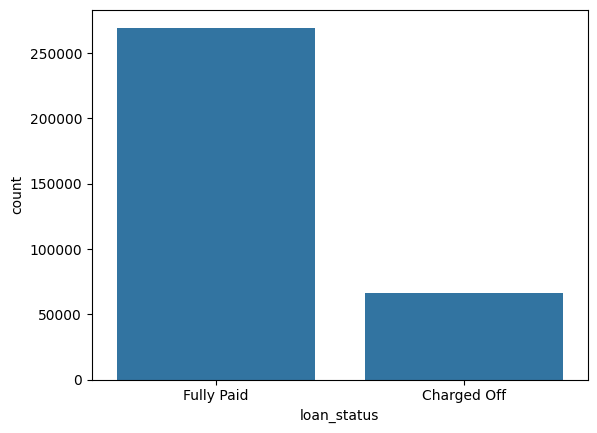

In [9]:
sns.countplot(x= df0['loan_status'])

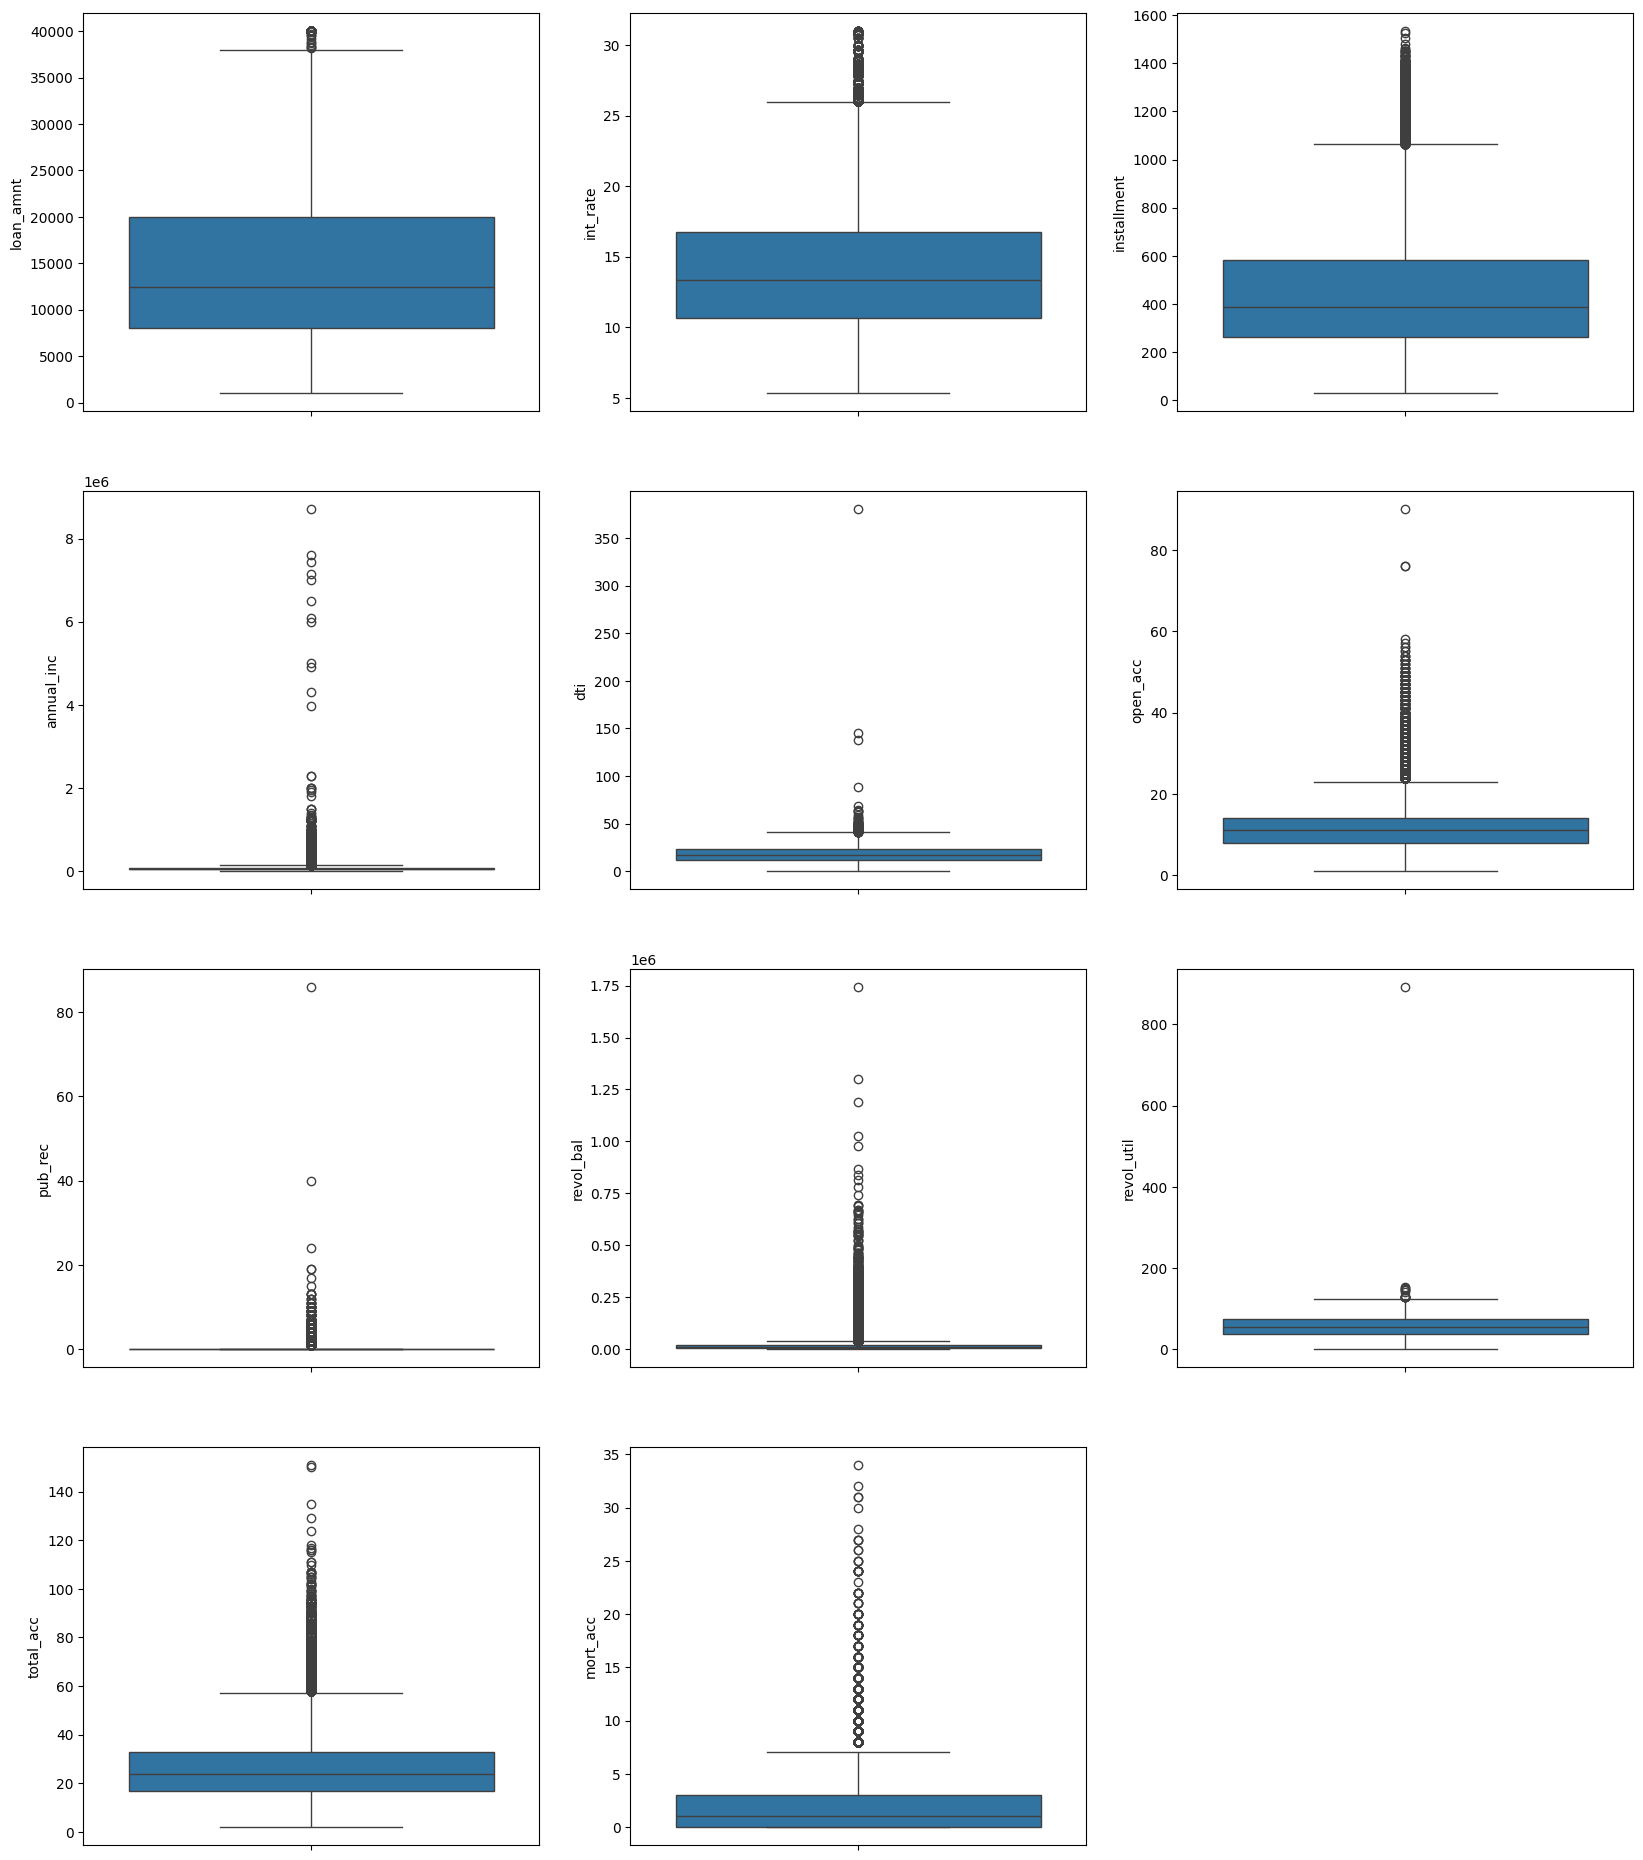

In [10]:
uni_aly = ['loan_amnt', 'int_rate', 'installment',
       'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util',
       'total_acc', 'mort_acc']
count = 0
plt.figure(figsize=(20,30))
for i in uni_aly:
    count += 1
    plt.subplot(5,3,count)
    sns.boxplot(y= df0[i])

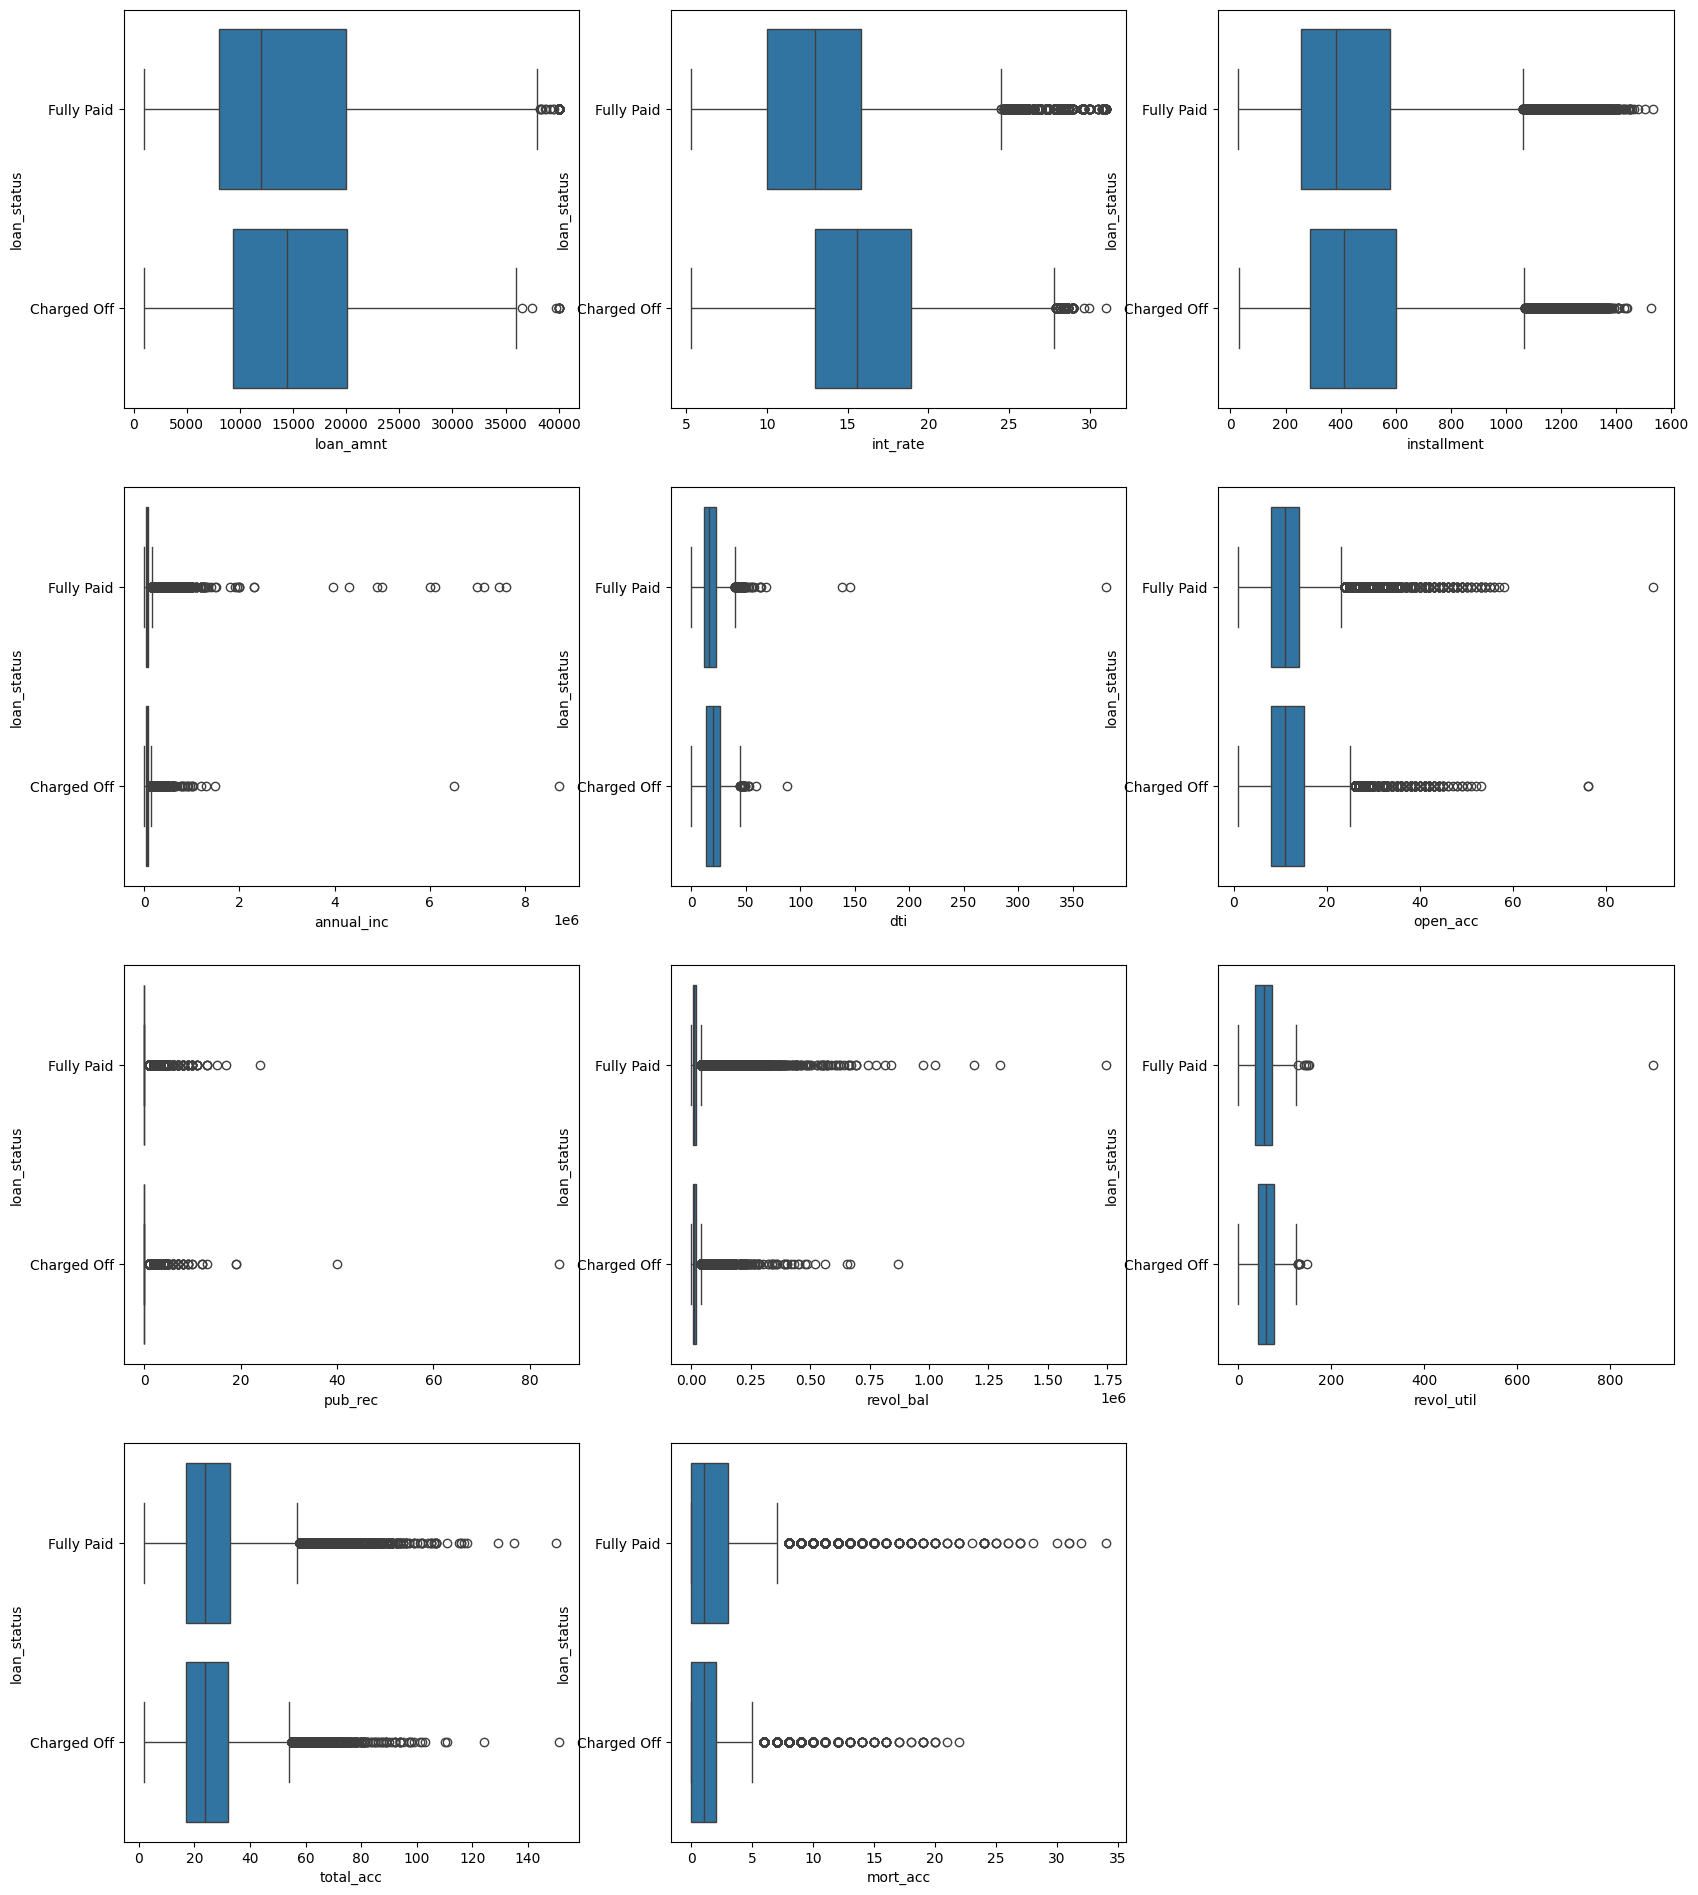

In [11]:
bi_aly = ['loan_amnt', 'int_rate', 'installment',
       'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util',
       'total_acc', 'mort_acc']
count = 1
plt.figure(figsize=(20,30))
for i in bi_aly:
  plt.subplot(5,3,count)
  sns.boxplot(x= df0[i], y=df0['loan_status'])
  count += 1

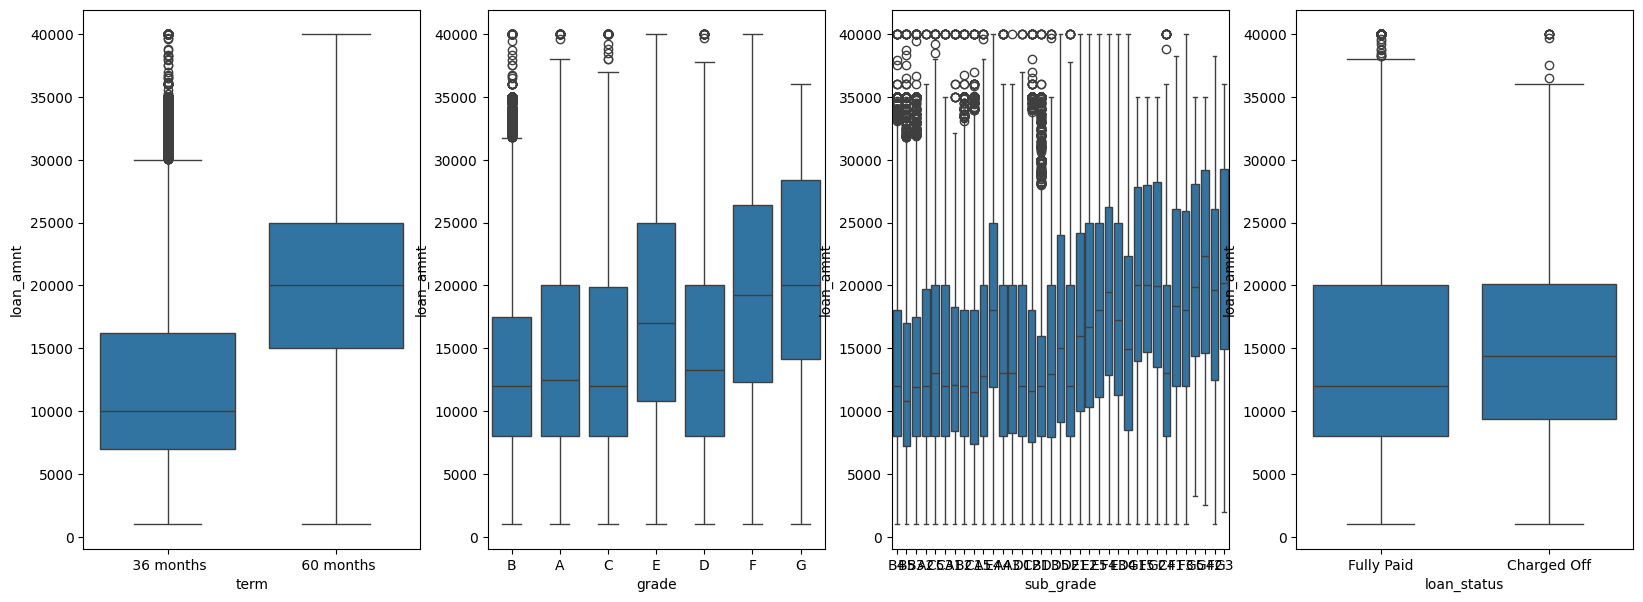

In [12]:
Mul_aly = ['term','grade', 'sub_grade','loan_status']
count = 1
plt.figure(figsize=(20,7))
for i in Mul_aly:
  plt.subplot(1,4,count)
  sns.boxplot( x= df0[i],y=df0['loan_amnt'])
  count += 1

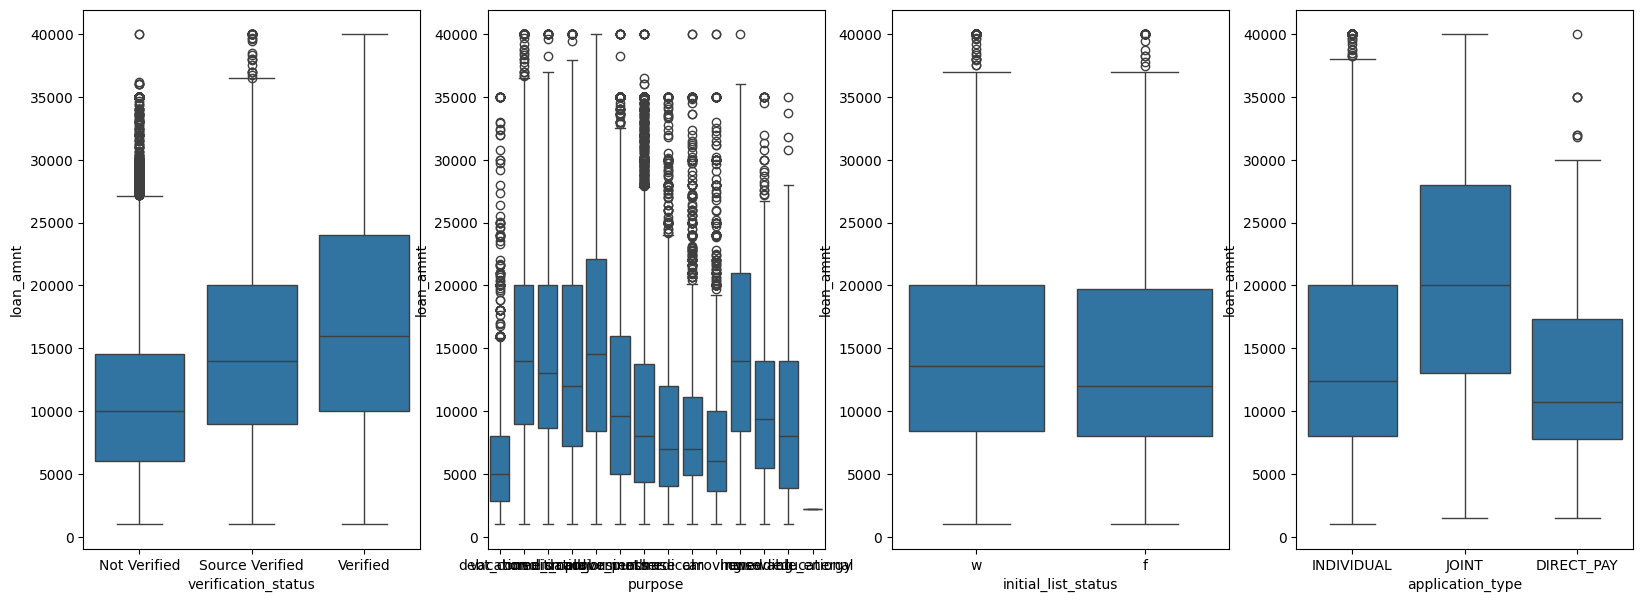

In [13]:
Mul_aly = ['verification_status', 'purpose','initial_list_status', 'application_type']
count = 1
plt.figure(figsize=(20,7))
for i in Mul_aly:
  plt.subplot(1,4,count)
  sns.boxplot( x= df0[i],y=df0['loan_amnt'])
  count += 1

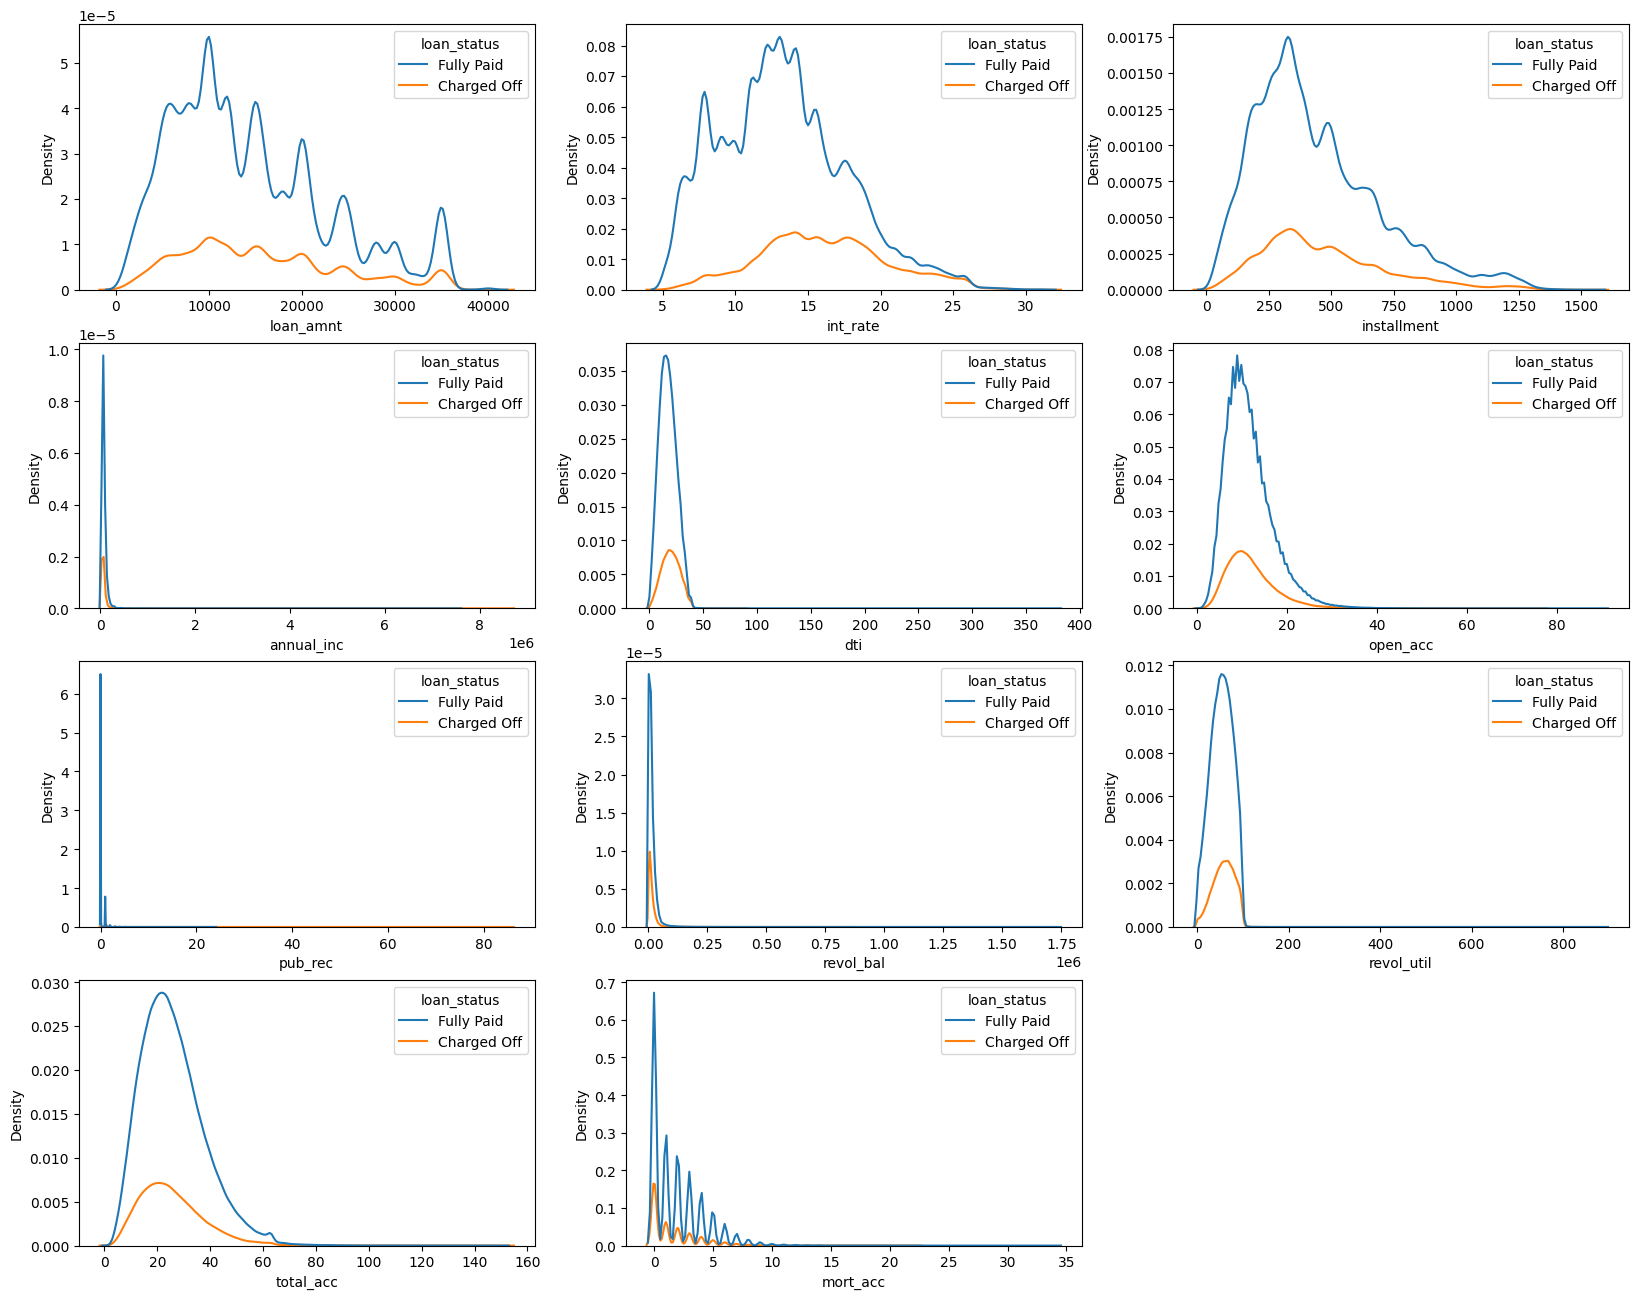

In [14]:
cor_catana = ['loan_amnt', 'int_rate', 'installment',
       'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util',
       'total_acc', 'mort_acc']
count = 1
plt.figure(figsize=(20,20))
for col in cor_catana:
  plt.subplot(5,3, count)
  sns.kdeplot(x=df0[col], hue=df0['loan_status'])
  count += 1

In [15]:
label_encoder = LabelEncoder()
df0['loan_status'] = label_encoder.fit_transform(df0['loan_status'])

# H0 = correlated
# HA = Not Correlated

fstats, pval = f_oneway(df0['loan_status'], df0['loan_amnt'],df0['int_rate'],
                       df0['installment'],df0['annual_inc'],df0['dti'],
                       df0['open_acc'],df0['pub_rec'],df0['revol_bal'],
                       df0['revol_util'],df0['total_acc'],df0['mort_acc'])
print('Not Correlated', pval, fstats) if pval < 0.05 else print('correlated' , pval, fstats)

Not Correlated 0.0 443362.3814247918


In [16]:
Catagical = ['term','grade', 'sub_grade', 'verification_status', 'purpose','initial_list_status', 'application_type']
df1 = df0.groupby(by=['loan_status']).agg({'term' : 'count',
                                           'grade': 'count',
                                           'sub_grade' :'count',
                                           'verification_status' :'count',
                                           'purpose':'count',
                                           'initial_list_status':'count',
                                           'application_type':'count' })
# H0 = Not correlated
# HA =  Correlated
stat, p, dof, expected = chi2_contingency(df1)

if p <= 0.05:
    print('Correlated (reject H0)', p)
else:
    print('Not correlated (H0 holds true)', p)

Not correlated (H0 holds true) 1.0


In [17]:
out_lst = ['loan_amnt', 'int_rate', 'installment',
       'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util',
       'total_acc', 'mort_acc']

# for col in out_lst:
#   q1 = df0[col].quantile(0.25)
#   q3 = df0[col].quantile(0.75)
#   IQR = q3 -q1
#   lower_limt, upper_limit = [q1-1.5*IQR, q3+1.5*IQR ]
#   print(lower_limt, upper_limit)
#   df0 = df0[ (df0[col] > lower_limt) & (df0[col] < upper_limit) ]
# df0.shape

for col in out_lst:
  mean = df0[col].mean()
  std = df0[col].std()
  lower_limt, upper_limit = mean-3*std, mean+3*std
  df0 = df0[ (df0[col] > lower_limt) & (df0[col] < upper_limit) ]
df0.shape

(308805, 27)

In [18]:
df0 = df0.reset_index().drop(columns=['index'], axis=1)

In [19]:
df0['ad_code'] = df0['address'].apply(lambda x : (re.findall('[A-Z]{2} [0-9]{5}' ,str(x)))[0])
df0['ad_diccode'] = df0['ad_code'].apply(lambda x : (str(x)).split(' ')[0])
df0['ad_dicpin'] = df0['ad_code'].apply(lambda x : (str(x)).split(' ')[1])
df0.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,ad_code,ad_diccode,ad_dicpin
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",OK 22690,OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",SD 05113,SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",WV 05113,WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",MA 00813,MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",VA 11650,VA,11650


<Axes: xlabel='ad_dicpin', ylabel='count'>

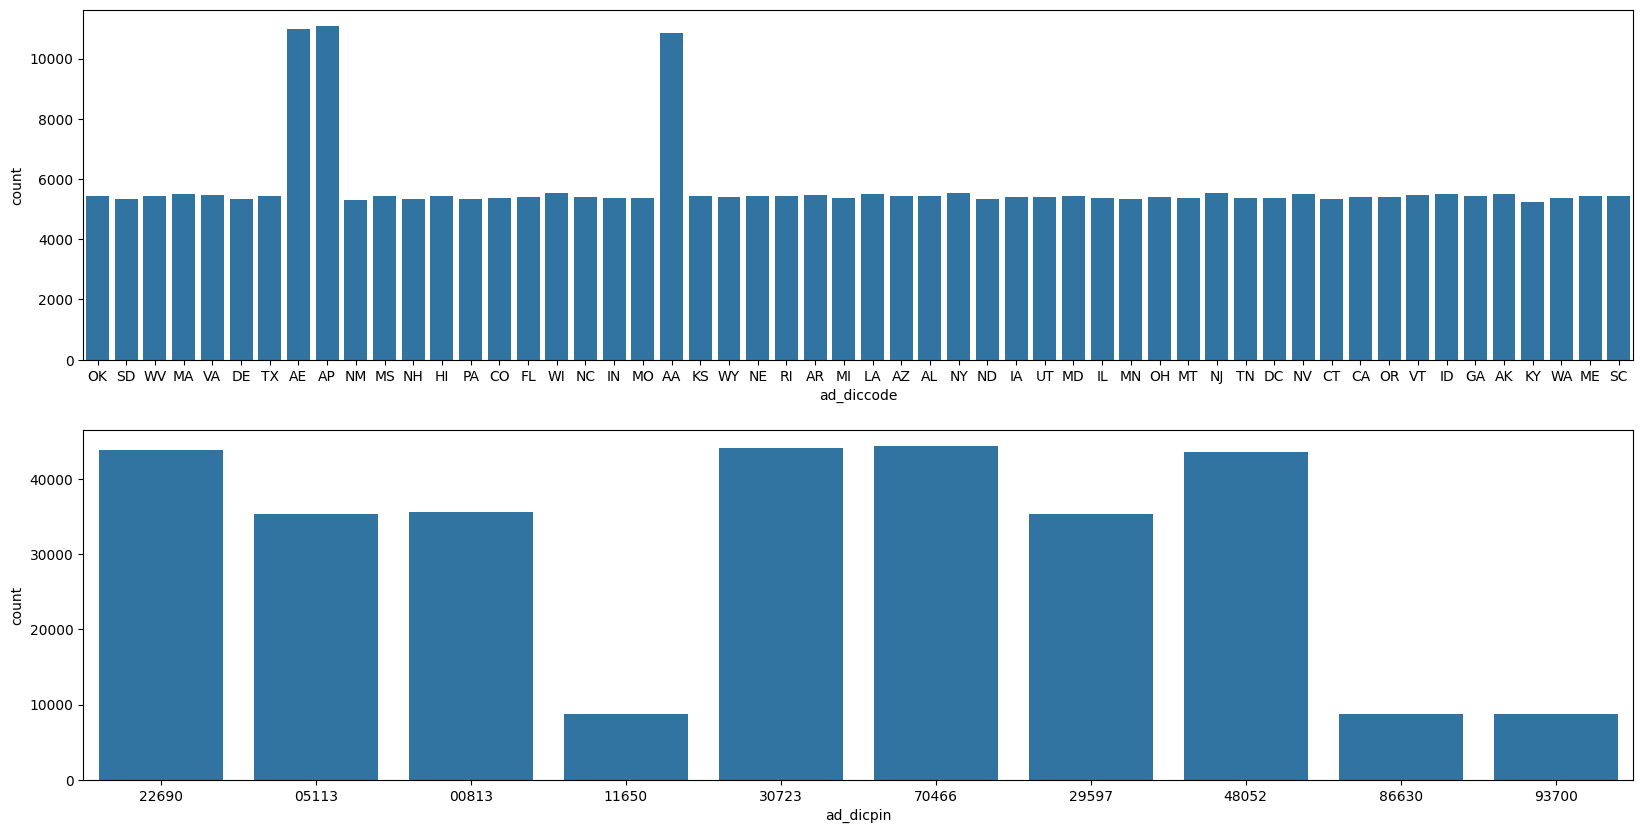

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.countplot(x= df0['ad_diccode'])

plt.subplot(2,1,2)
sns.countplot(x= df0['ad_dicpin'])

In [21]:
# as for now we have splited the adress in to, so we dont need col : 'address', ad_code. hence remove it.
df1 = df0.copy()
df1 = df1.drop(columns=['address' , 'ad_code'], axis=1)

In [22]:
df1[['issue_d']].head()

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015
3,Nov-2014
4,Apr-2013


In [23]:
df1['issue_month'] = df1['issue_d'].apply(lambda x : str(x).split('-')[0])
df1['issue_year'] = df1['issue_d'].apply(lambda x : str(x).split('-')[1])

<Axes: xlabel='issue_year', ylabel='count'>

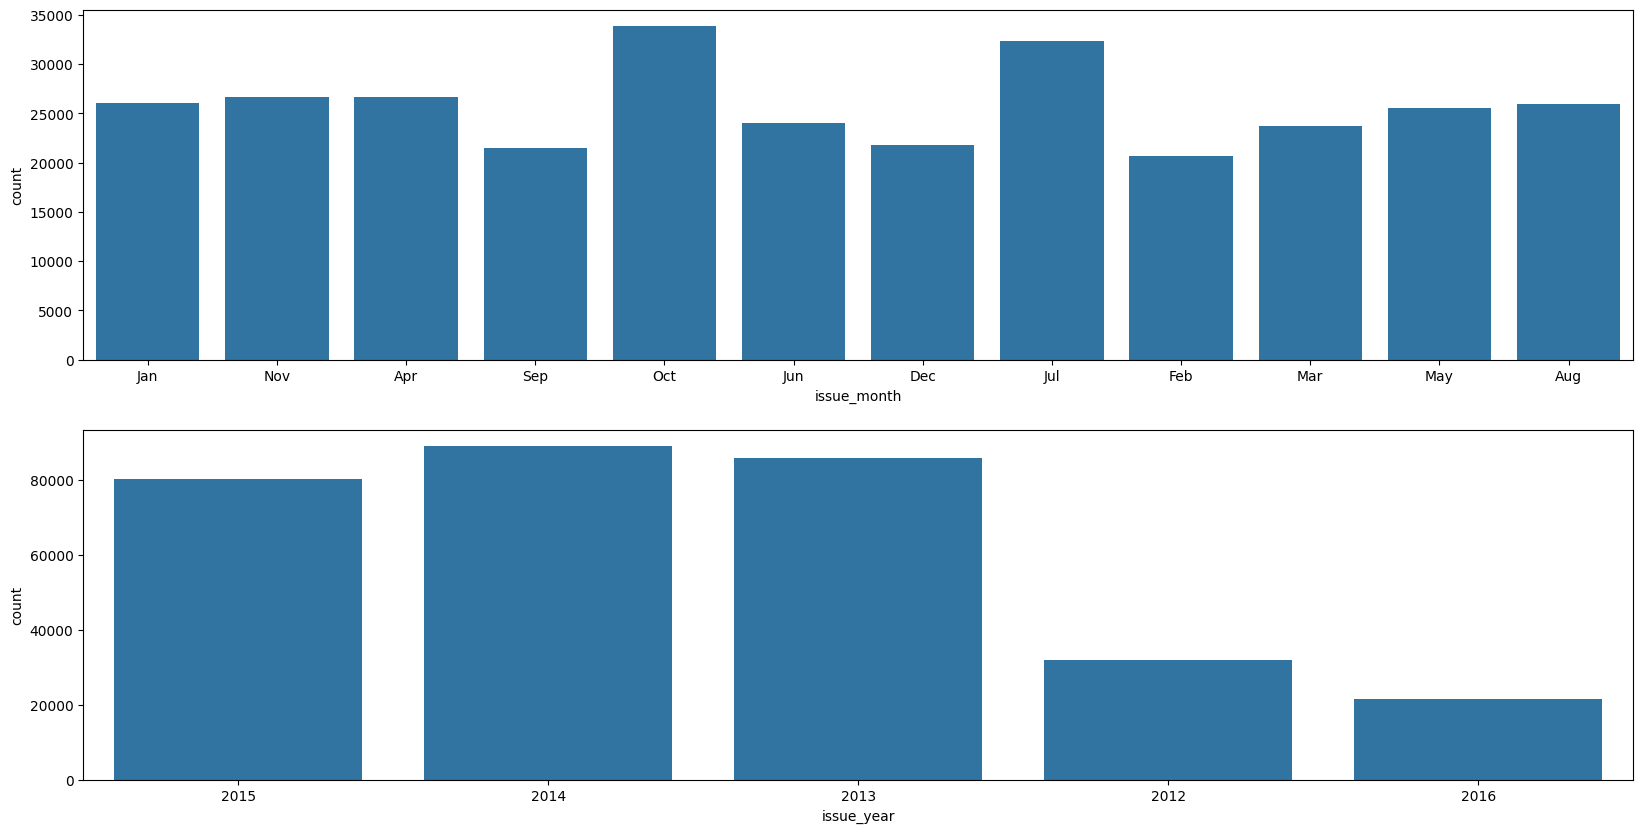

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.countplot(x= df1['issue_month'])

plt.subplot(2,1,2)
sns.countplot(x= df1['issue_year'])

In [25]:
# we dont want this col anymore or it will get in milticoleanirity
df1 = df1.drop(columns=['issue_d'], axis=1)

In [26]:
df1['title'].nunique()

30796

In [27]:
# we cant encore this 30797 values that make no sense so it better to drop it
df1 = df1.drop(columns=['title'], axis=1)

In [28]:
df1[['earliest_cr_line']].head()

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999


In [29]:
df1['earliest_cr_line_month'] = df1['earliest_cr_line'].apply(lambda x : str(x).split('-')[0])
df1['earliest_cr_line_year'] = df1['earliest_cr_line'].apply(lambda x : str(x).split('-')[1])

In [30]:
df1 = df1.drop(columns=['earliest_cr_line'], axis=1)

In [31]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0.0,0.0,OK,22690,Jan,2015,Jun,1990
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,f,INDIVIDUAL,3.0,0.0,SD,05113,Jan,2015,Jul,2004
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,f,INDIVIDUAL,0.0,0.0,WV,05113,Jan,2015,Aug,2007
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,f,INDIVIDUAL,0.0,0.0,MA,00813,Nov,2014,Sep,2006
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,f,INDIVIDUAL,1.0,0.0,VA,11650,Apr,2013,Mar,1999


In [32]:
for col in df1.columns:
  print(col, '->', df1[col].nunique())

loan_amnt -> 1370
term -> 2
int_rate -> 241
installment -> 46597
grade -> 7
sub_grade -> 35
emp_title -> 141902
emp_length -> 11
home_ownership -> 6
annual_inc -> 19695
verification_status -> 3
loan_status -> 2
purpose -> 13
dti -> 4045
open_acc -> 27
pub_rec -> 2
revol_bal -> 46722
revol_util -> 1133
total_acc -> 58
initial_list_status -> 2
application_type -> 3
mort_acc -> 9
pub_rec_bankruptcies -> 2
ad_diccode -> 54
ad_dicpin -> 10
issue_month -> 12
issue_year -> 5
earliest_cr_line_month -> 12
earliest_cr_line_year -> 64


In [33]:
df1['term'] = label_encoder.fit_transform(df1['term'])
df1['grade'] = label_encoder.fit_transform(df1['grade'])
df1['sub_grade'] = label_encoder.fit_transform(df1['sub_grade'])
df1['emp_length'] = label_encoder.fit_transform(df1['emp_length'])
df1['home_ownership'] = label_encoder.fit_transform(df1['home_ownership'])
df1['verification_status'] = label_encoder.fit_transform(df1['verification_status'])
df1['loan_status'] = label_encoder.fit_transform(df1['loan_status'])
df1['purpose'] = label_encoder.fit_transform(df1['purpose'])
df1['pub_rec'] = label_encoder.fit_transform(df1['pub_rec'])
df1['initial_list_status'] = label_encoder.fit_transform(df1['initial_list_status'])
df1['application_type'] = label_encoder.fit_transform(df1['application_type'])
df1['mort_acc'] = label_encoder.fit_transform(df1['mort_acc'])
df1['pub_rec_bankruptcies'] = label_encoder.fit_transform(df1['pub_rec_bankruptcies'])
df1['ad_diccode'] = label_encoder.fit_transform(df1['ad_diccode'])
df1['ad_dicpin'] = label_encoder.fit_transform(df1['ad_dicpin'])
df1['open_acc'] = label_encoder.fit_transform(df1['open_acc'])
df1['issue_month'] = label_encoder.fit_transform(df1['issue_month'])
df1['issue_year'] = label_encoder.fit_transform(df1['issue_year'])
df1['earliest_cr_line_month'] = label_encoder.fit_transform(df1['earliest_cr_line_month'])
df1['earliest_cr_line_year'] = label_encoder.fit_transform(df1['earliest_cr_line_year'])

In [34]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,329.48,1,8,Marketing,1,5,117000.0,...,1,1,0,0,39,3,4,3,6,40
1,8000.0,0,11.99,265.68,1,9,Credit analyst,4,1,65000.0,...,0,1,3,0,44,1,4,3,5,54
2,15600.0,0,10.49,506.97,1,7,Statistician,10,5,43057.0,...,0,1,0,0,52,1,4,3,1,57
3,7200.0,0,6.49,220.65,0,1,Client Advocate,6,5,54000.0,...,0,1,0,0,22,0,9,2,11,56
4,24375.0,1,17.27,609.33,2,14,Destiny Management Inc.,9,1,55000.0,...,0,1,1,0,48,2,0,1,7,49


In [35]:
# target encoding
df_tenc = pd.DataFrame({'emp_title' : df1['emp_title'], 'target' : df1['loan_status']})
target_mean = df_tenc.groupby(by=['emp_title'])['target'].mean()
df1['emp_title'] = df_tenc['emp_title'].map(target_mean)
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,329.48,1,8,0.756098,1,5,117000.0,...,1,1,0,0,39,3,4,3,6,40
1,8000.0,0,11.99,265.68,1,9,0.666667,4,1,65000.0,...,0,1,3,0,44,1,4,3,5,54
2,15600.0,0,10.49,506.97,1,7,0.888889,10,5,43057.0,...,0,1,0,0,52,1,4,3,1,57
3,7200.0,0,6.49,220.65,0,1,1.000000,6,5,54000.0,...,0,1,0,0,22,0,9,2,11,56
4,24375.0,1,17.27,609.33,2,14,0.000000,9,1,55000.0,...,0,1,1,0,48,2,0,1,7,49


In [36]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ad_diccode,ad_dicpin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,329.48,1,8,0.756098,1,5,117000.0,...,1,1,0,0,39,3,4,3,6,40
1,8000.0,0,11.99,265.68,1,9,0.666667,4,1,65000.0,...,0,1,3,0,44,1,4,3,5,54
2,15600.0,0,10.49,506.97,1,7,0.888889,10,5,43057.0,...,0,1,0,0,52,1,4,3,1,57
3,7200.0,0,6.49,220.65,0,1,1.000000,6,5,54000.0,...,0,1,0,0,22,0,9,2,11,56
4,24375.0,1,17.27,609.33,2,14,0.000000,9,1,55000.0,...,0,1,1,0,48,2,0,1,7,49


In [37]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'ad_diccode', 'ad_dicpin', 'issue_month',
       'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [38]:
# checking that all col are nummeric...
for col in df1:
  print(col, df1[col].unique(), '\n')

loan_amnt [10000.  8000. 15600. ... 34175. 36475. 34700.] 

term [0 1] 

int_rate [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11  9.17
  6.62  8.39 21.98 12.29  7.9   6.97 15.61 13.35 12.12  9.99  8.19 18.75
 14.99 13.67 13.98 17.86 21.49 12.99 18.54 17.1  18.25 11.67  6.24  8.18
 12.35 18.55 22.15 15.99 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 16.99 16.55 19.97  7.89 24.7  16.49 25.78 25.83 13.99 15.22 15.31  7.69
 19.53 10.16  7.62  9.75 13.68 15.88 23.83 10.75 18.49 20.31 17.57 27.31
 22.99 14.33 13.53 22.45 14.64 24.5  17.99  9.16 14.65 12.49 11.55 17.76
 20.49 22.7  17.56  6.03  6.89 19.52  8.9  14.3   9.49 25.99 24.08 13.05
 14.98 16.59 10.15 25.89 21.99 23.99 11.49 14.16 14.47 11.53  8.67 13.49
  8.59 10.64 25.44  9.71 16.2  19.24 24.11 15.8  14.49 23.28 19.99 18.24
 14.09  9.25 19.05 17.77 18.92 13.65  7.12 16.78 18.99 14.46 12.59 16.24
 25.49  7.39 10.78 12.85 12.39 21.18 21.97  6.39  7.49 25.57 20.99 11.47
  7.26 14.31 24.24 23.43 19.47 23.32  9.76

In [39]:
X = df1[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'ad_diccode', 'ad_dicpin', 'issue_month',
       'issue_year', 'earliest_cr_line_month', 'earliest_cr_line_year']]
y = df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((247044, 28), (61761, 28), (247044,), (61761,))

In [40]:
# scaler = StandardScaler()
# scaler.fit(X_train)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [42]:
x_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, x_sm)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     9628.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:32:32   Log-Likelihood:                -32113.
No. Observations:              247044   AIC:                         6.428e+04
Df Residuals:                  247015   BIC:                         6.459e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2175      0.018     11.867      0.0

In [43]:
model.score(X_test, y_test)

0.9060572205760917

In [44]:
dic = {}
for coef, col in zip(model.coef_[0], df1.columns):
  dic[col] = abs(coef)
a = sorted(dic.items(), key = lambda kv: (kv[1], kv[0]))
for i in a:
  print(i)

('issue_year', 0.011869104209346957)
('ad_dicpin', 0.01955193123443032)
('loan_status', 0.02721608919566847)
('issue_month', 0.044622635686151206)
('verification_status', 0.045355619927440145)
('pub_rec_bankruptcies', 0.045480829238963565)
('total_acc', 0.07200390360132593)
('emp_length', 0.11608090501421332)
('annual_inc', 0.11698426813248569)
('open_acc', 0.14641978128314773)
('grade', 0.15581590468494297)
('earliest_cr_line_month', 0.19790046423514426)
('mort_acc', 0.2588936531918058)
('application_type', 0.2632389747143659)
('loan_amnt', 0.26752505864750525)
('home_ownership', 0.3383835024501571)
('revol_util', 0.39703002977690915)
('pub_rec', 0.4924756182596904)
('term', 0.5609253577232373)
('revol_bal', 0.7436454057216051)
('installment', 0.8309439606638329)
('dti', 0.8590666186610505)
('initial_list_status', 0.9881529427734629)
('purpose', 1.025594341107337)
('ad_diccode', 3.5041998966487498)
('int_rate', 3.6956830661857825)
('sub_grade', 5.904269724282886)
('emp_title', 8.79026

In [45]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('cm', cm)
print('f1 score', f1_score(y_test, y_pred))

cm [[ 7677  4419]
 [ 1383 48282]]
f1 score 0.9433210245589356


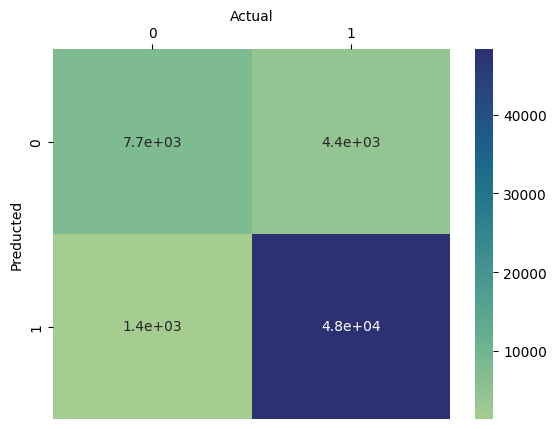

In [46]:
ax = sns.heatmap(cm, annot=True, cmap="crest")
ax.set(xlabel="Actual", ylabel="Preducted")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.63      0.73     12096
           1       0.92      0.97      0.94     49665

    accuracy                           0.91     61761
   macro avg       0.88      0.80      0.83     61761
weighted avg       0.90      0.91      0.90     61761



In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((247044, 28), (61761, 28), (247044,), (61761,))

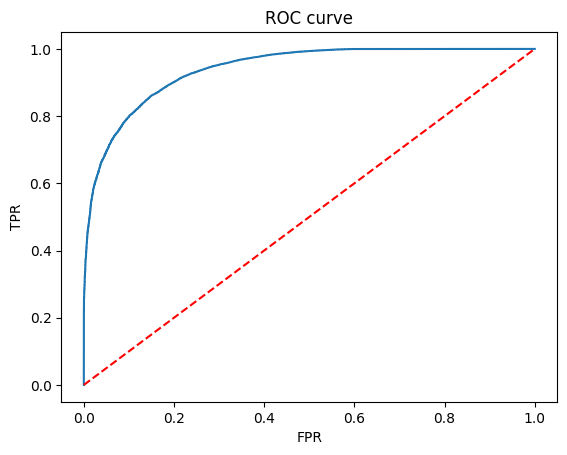

In [49]:
prob = (model.predict_proba(X_test))[:,1]
fpr, tpr, thr = roc_curve(y_test, prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [50]:
roc_auc_score(y_test,prob)

0.9398215780517829

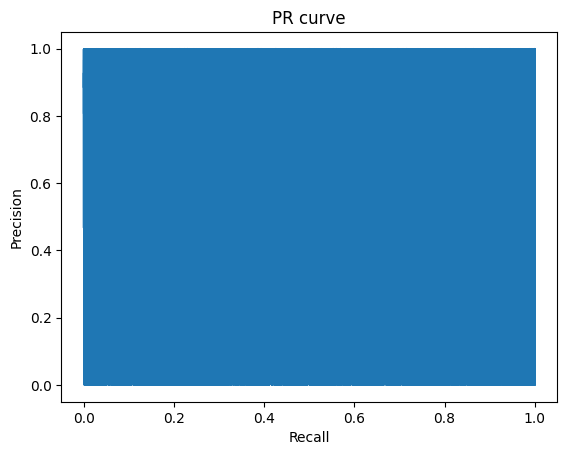

In [51]:
precision, recall, thr = precision_recall_curve(y_test, prob)
plt.plot(recall[:-1], prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [52]:
auc(recall, precision)

0.9834520439587113